<a href="https://colab.research.google.com/github/Onyimatics/msc_dissertation/blob/master/Basic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Jul 30 12:31:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install wordcloud
!pip install nltk

In [ ]:
# from google.colab import files
# uploaded = files.upload()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/BCU/MSc Dissertation/fibromyalgia_forum_preprocessed.csv'
df = pd.read_csv(file_path)
df_clean = pd.read_csv(file_path)
df.head()

,Unnamed: 0,thread_id,thread_title,thread_url,forum_category,thread_views,thread_replies,total_posts,post_type,post_index,...,post_year,post_month,year_joined,post_length_bucket,user_activity_level,thread_activity_level,tokens,processed_text,clinical_concepts,concept_text
0,0,my-advice-for-managing-fibromyalgia-especially...,My advice for managing fibromyalgia (especiall...,https://www.fibromyalgiaforums.org/community/t...,General discussions about fibromyalgia,27000,29,30,original_post,0,...,2020,7,2016,Very Long,Superuser,High,"['doctor', 'person', 'live', 'fibromyalgia', '...",doctor person live fibromyalgia research trial...,"['caffeine', 'pain', 'worry', 'depressed', 'la...",caffeine pain worry depressed lactose fibromya...
1,1,my-advice-for-managing-fibromyalgia-especially...,My advice for managing fibromyalgia (especiall...,https://www.fibromyalgiaforums.org/community/t...,General discussions about fibromyalgia,27000,29,30,reply,1,...,2020,7,2020,Long,Occasional,High,"['familiarise', 'condition', 'informative', 's...",familiarise condition informative strong chara...,"['pain', 'fatigue', 'autoimmune disease', 'pai...",pain fatigue autoimmune disease pains fibromya...
2,2,my-advice-for-managing-fibromyalgia-especially...,My advice for managing fibromyalgia (especiall...,https://www.fibromyalgiaforums.org/community/t...,General discussions about fibromyalgia,27000,29,30,reply,2,...,2020,7,2020,Medium,Inactive,High,"['commonality', 'fibro', 'symptom', 'symptom',...",commonality fibro symptom symptom pppd aka per...,"['tingling sensation', 'fatigue', 'chlorine', ...",tingling sensation fatigue chlorine dizziness
3,3,my-advice-for-managing-fibromyalgia-especially...,My advice for managing fibromyalgia (especiall...,https://www.fibromyalgiaforums.org/community/t...,General discussions about fibromyalgia,27000,29,30,reply,3,...,2020,7,2016,Medium,Superuser,High,"['eff', 'lovely', 'compliment', 'write', 'help...",eff lovely compliment write helpful pandemic c...,"['pandemic', 'pain']",pandemic pain
4,4,my-advice-for-managing-fibromyalgia-especially...,My advice for managing fibromyalgia (especiall...,https://www.fibromyalgiaforums.org/community/t...,General discussions about fibromyalgia,27000,29,30,reply,4,...,2020,7,2016,Long,Superuser,High,"['dizzyliz', 'pppd', 'introduce', 'existence',...",dizzyliz pppd introduce existence disorder sou...,"['pain', 'fatigue']",pain fatigue


In [ ]:
# import pandas as pd

# # Load CSV
# df = pd.read_csv("fibro_forum_data_all_flattened.csv")

# # Preview
# df.head()


In [ ]:
# Basic EDA summary dictionary
summary = {
    "Total posts": len(df),
    "Original posts": len(df[df["post_type"] == "original_post"]),
    "Replies": len(df[df["post_type"] == "reply"]),
    "Unique users": df["username"].nunique(),
    "Forum categories": df["forum_category"].nunique(),
    "Posts with content": df["content"].notna().sum(),
    "Posts missing content": df["content"].isna().sum(),
    "Top forum categories": df["forum_category"].value_counts().head(5).to_dict(),
    "Top contributors": df["username"].value_counts().head(5).to_dict(),
    # "Average word count": df["word_count"].mean(),
    # "Average char count": df["char_count"].mean(),
}

# Show summary
import pprint
pprint.pprint(summary)


{'Forum categories': 14,
 'Original posts': 8269,
 'Posts missing content': np.int64(0),
 'Posts with content': np.int64(66611),
 'Replies': 58342,
 'Top contributors': {'1sweed': 2114,
                      'Auriel': 1882,
                      'JayCS': 3098,
                      'Trellum': 1792,
                      'sunkacola': 4008},
 'Top forum categories': {'Chronic pain': 5097,
                          'Do I have fibromyalgia?': 4168,
                          'General discussions about fibromyalgia': 27529,
                          'Moan, complain and vent': 6478,
                          'Welcome new members': 7735},
 'Total posts': 66611,
 'Unique users': 5700}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style
sns.set(style="whitegrid")


Forum Category Distribution

/tmp/ipython-input-12-3222712763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


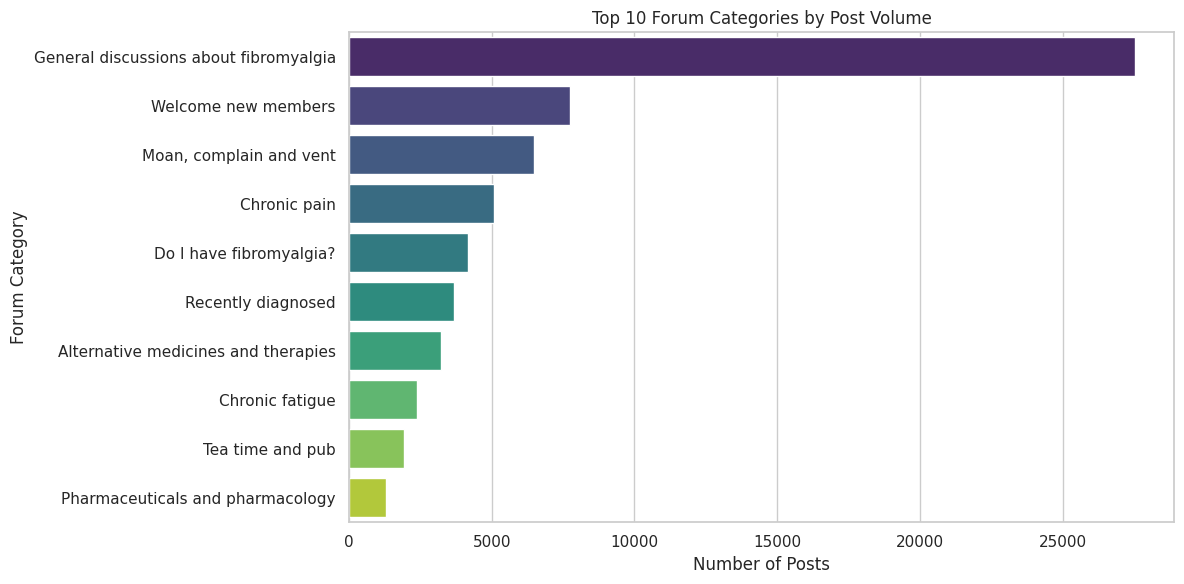

In [ ]:
plt.figure(figsize=(12, 6))
top_categories = df['forum_category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Forum Categories by Post Volume")
plt.xlabel("Number of Posts")
plt.ylabel("Forum Category")
plt.tight_layout()
plt.show()


Top Contributors

/tmp/ipython-input-13-956019746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette="rocket")


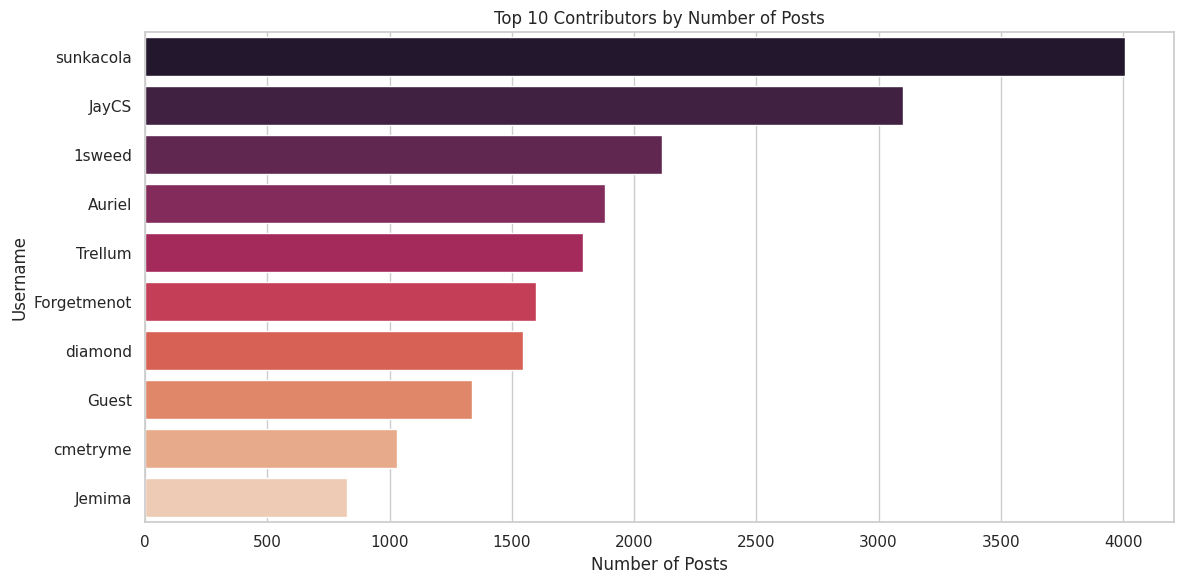

In [ ]:
plt.figure(figsize=(12, 6))
top_users = df['username'].value_counts().head(10)
sns.barplot(x=top_users.values, y=top_users.index, palette="rocket")
plt.title("Top 10 Contributors by Number of Posts")
plt.xlabel("Number of Posts")
plt.ylabel("Username")
plt.tight_layout()
plt.show()


Word Count Distribution

In [ ]:
# Calculate word count for each post
df['word_count'] = df['content'].str.split().str.len()

# Display the first few rows with the new column
display(df[['content', 'word_count']].head())

,content,word_count
0,"I am not a doctor or anything, just a person w...",1964
1,"Hi Sunkacola, I am quite new to this forum. I ...",328
2,"Hi everyone. This may or may not be of use, ...",151
3,"Hello Eff, Thanks very much for your lovely co...",156
4,"Hi DizzyLiz, I have never heard of PPPD, so th...",249


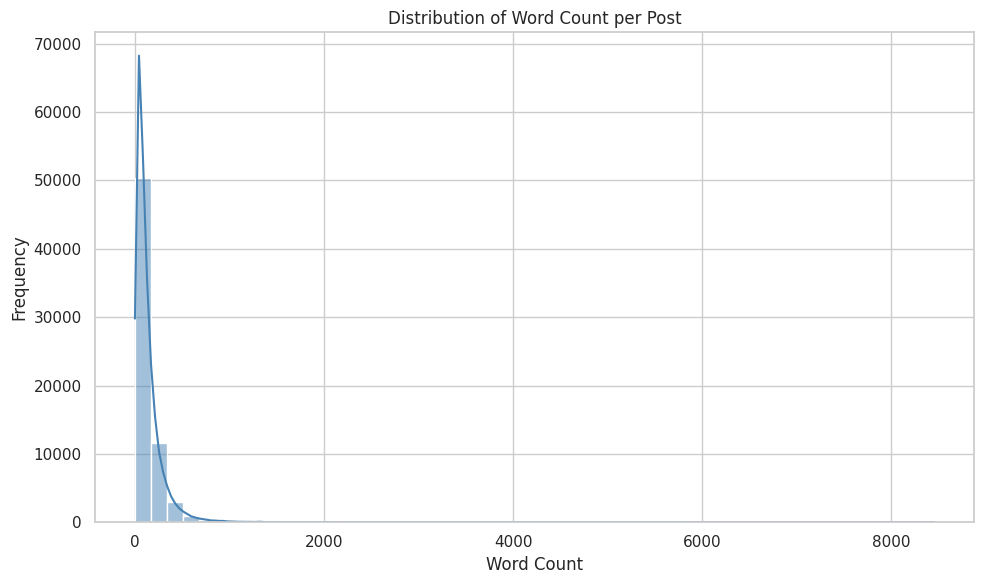

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color="steelblue")
plt.title("Distribution of Word Count per Post")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Character Count Distribution

In [ ]:
# Calculate character count for each post
df['char_count'] = df['content'].str.len()

# Display the first few rows with the new column
display(df[['content', 'char_count']].head())

,content,char_count
0,"I am not a doctor or anything, just a person w...",10478
1,"Hi Sunkacola, I am quite new to this forum. I ...",1757
2,"Hi everyone. This may or may not be of use, ...",942
3,"Hello Eff, Thanks very much for your lovely co...",781
4,"Hi DizzyLiz, I have never heard of PPPD, so th...",1274


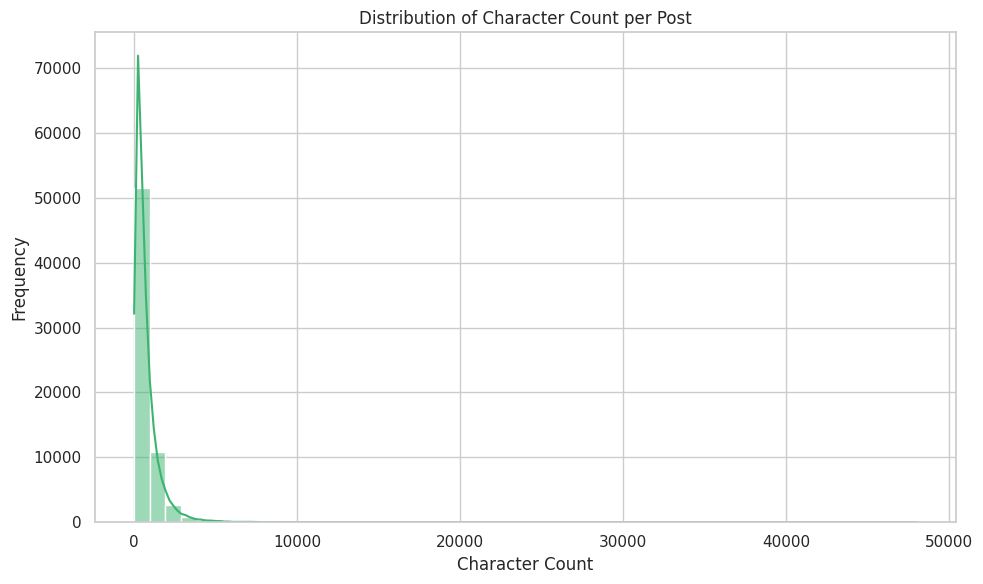

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['char_count'], bins=50, kde=True, color="mediumseagreen")
plt.title("Distribution of Character Count per Post")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Post Type Breakdown

/tmp/ipython-input-21-4066290537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="post_type", palette="pastel")


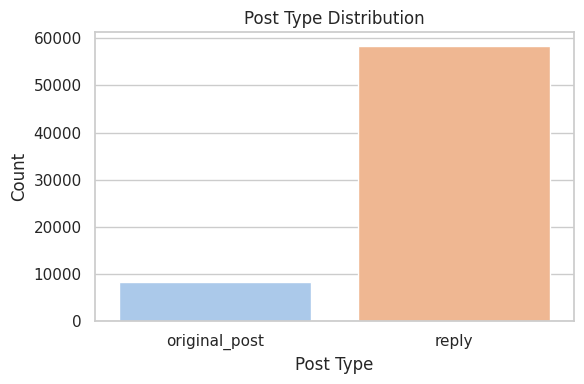

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="post_type", palette="pastel")
plt.title("Post Type Distribution")
plt.xlabel("Post Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Grouped Visualization: Average Word Count per Forum Category

/tmp/ipython-input-22-3903863751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_words_by_category.values, y=avg_words_by_category.index, palette="mako")


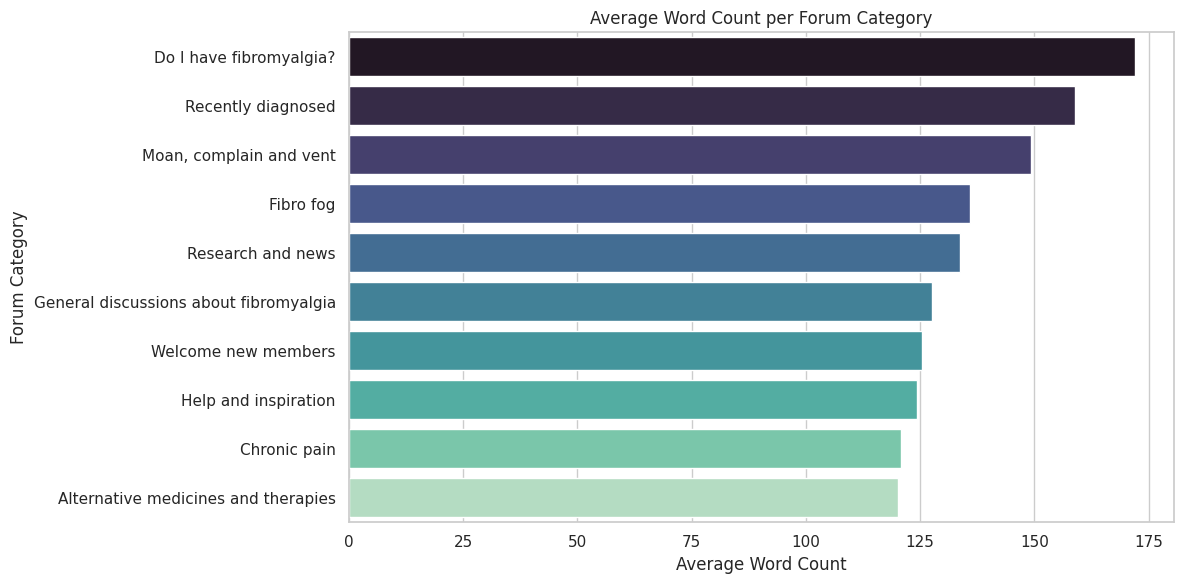

In [ ]:
plt.figure(figsize=(12, 6))
avg_words_by_category = df.groupby("forum_category")["word_count"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_words_by_category.values, y=avg_words_by_category.index, palette="mako")
plt.title("Average Word Count per Forum Category")
plt.xlabel("Average Word Count")
plt.ylabel("Forum Category")
plt.tight_layout()
plt.show()


Plotting Activity Over Time (Posts per Month)

In [ ]:
# Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce", utc=True)
print(df["timestamp"].dtype)

datetime64[ns, UTC]


/tmp/ipython-input-24-3821360506.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["timestamp"].dt.to_period("M")


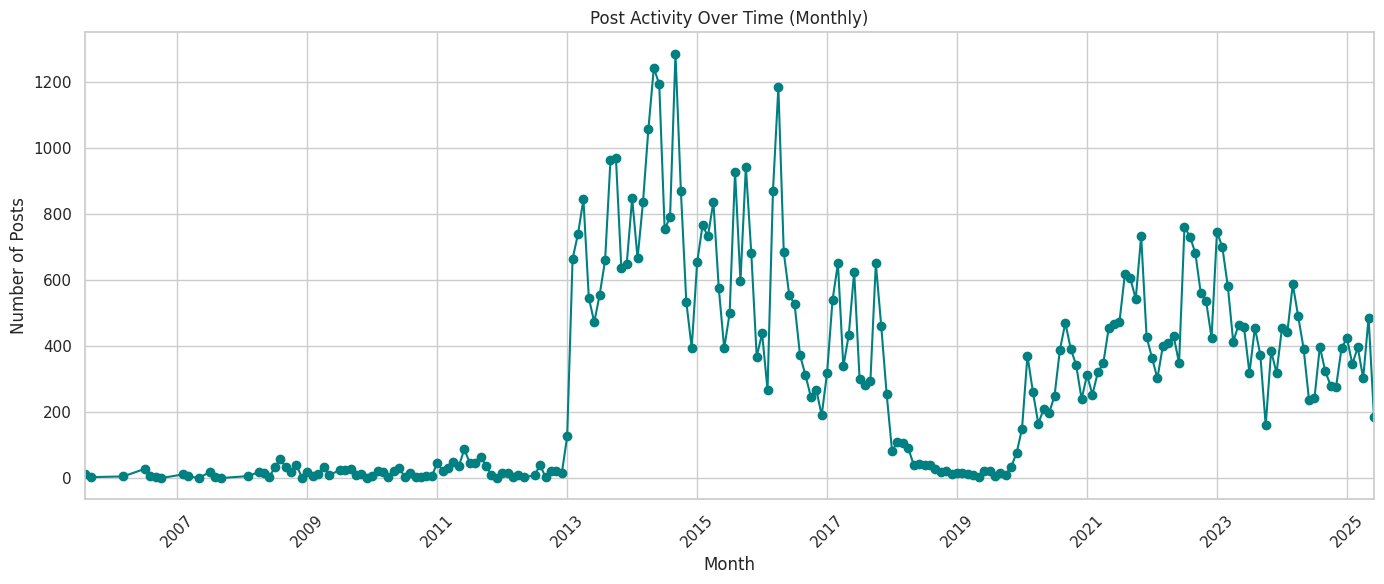

In [ ]:
# Extract the month from timestamp
df["month"] = df["timestamp"].dt.to_period("M")

# Count posts per month
monthly_post_counts = df.groupby("month").size().sort_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
monthly_post_counts.plot(kind="line", marker="o", color="teal")
plt.title("Post Activity Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Post Timing Analysis

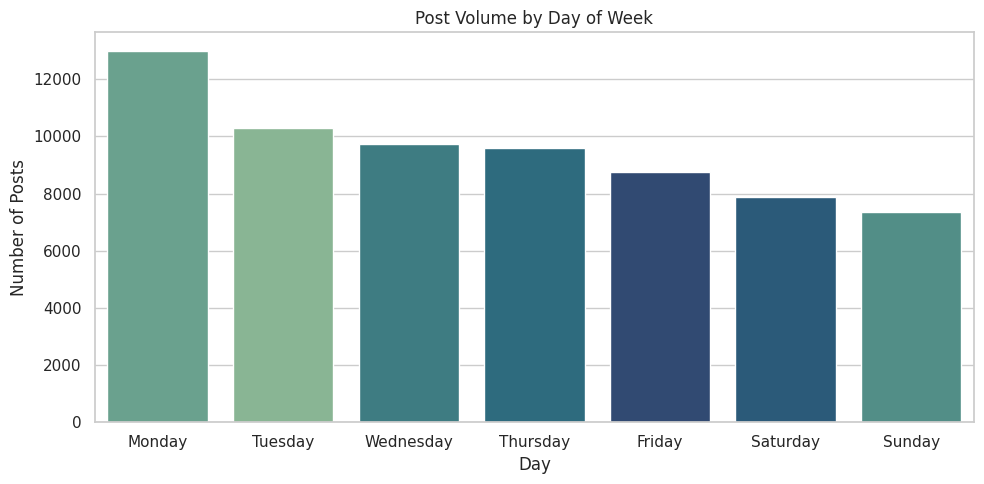

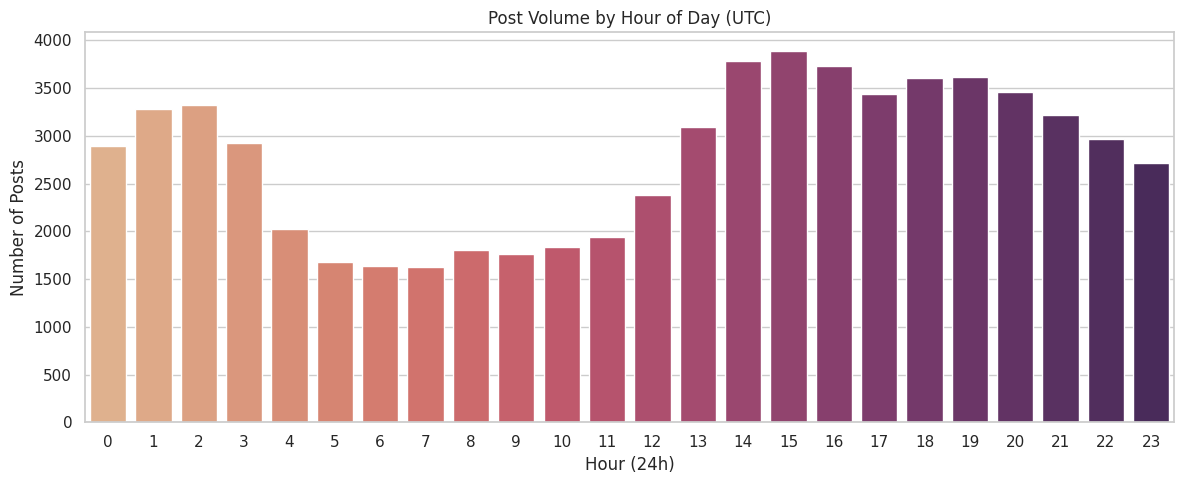

In [ ]:
# Extract day of week and hour of day
df["day_of_week"] = df["timestamp"].dt.day_name()
df["hour_of_day"] = df["timestamp"].dt.hour

# Plot post volume by day of week
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="day_of_week", hue="day_of_week", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="crest", legend=False)
plt.title("Post Volume by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

# Plot post volume by hour of day
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="hour_of_day", palette="flare", hue="hour_of_day", legend=False)
plt.title("Post Volume by Hour of Day (UTC)")
plt.xlabel("Hour (24h)")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()



Binning Posts into Time Ranges

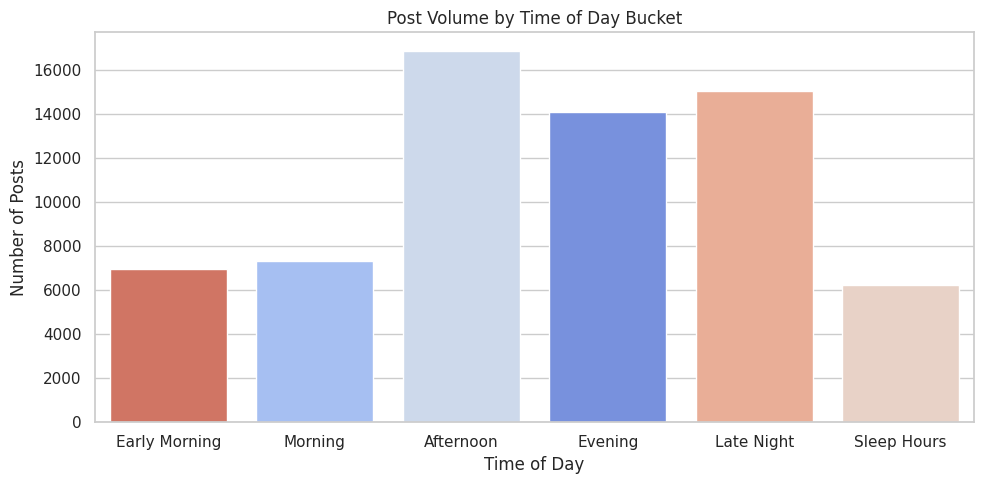

In [ ]:
def time_of_day_bucket(hour):
    if 4 <= hour < 8:
        return "Early Morning"
    elif 8 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    elif 21 <= hour <= 23 or 0 <= hour < 2:
        return "Late Night"
    else:
        return "Sleep Hours"

# Create column
df["time_bucket"] = df["hour_of_day"].apply(time_of_day_bucket)

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="time_bucket", hue="time_bucket", order=["Early Morning", "Morning", "Afternoon", "Evening", "Late Night", "Sleep Hours"], palette="coolwarm", legend=False)
plt.title("Post Volume by Time of Day Bucket")
plt.xlabel("Time of Day")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


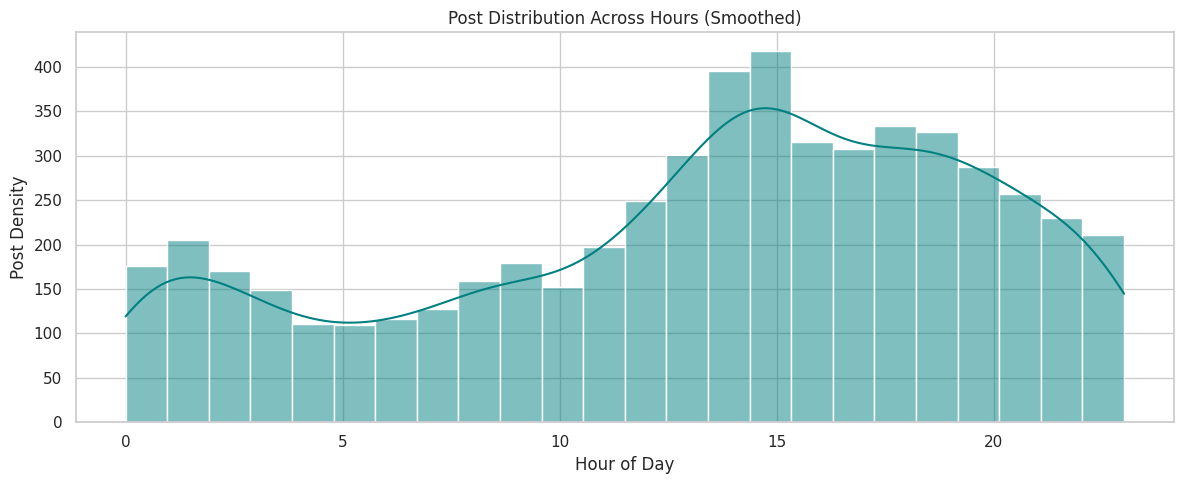

In [ ]:
# Optional smoothing using histogram
plt.figure(figsize=(12, 5))
sns.histplot(df["hour_of_day"], bins=24, kde=True, color="teal")
plt.title("Post Distribution Across Hours (Smoothed)")
plt.xlabel("Hour of Day")
plt.ylabel("Post Density")
plt.tight_layout()
plt.show()


Preprocess Text for Word Frequency

In [ ]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words and len(t) > 2]
    return tokens


In [ ]:
def top_words_by_category(df, category_name, n=15):
    category_posts = df[df["forum_category"] == category_name]["content"].dropna()
    all_words = []
    for post in category_posts:
        all_words.extend(preprocess_text(post))
    top = Counter(all_words).most_common(n)
    return top


In [ ]:
# Change this to any forum category in your data
print("🔹 Top words in 'Chronic Pain':")
top_words_by_category(df, "Chronic pain", n=20)


🔹 Top words in 'Chronic Pain':


[('pain', 625),
 ('get', 246),
 ('like', 244),
 ('back', 229),
 ('said', 196),
 ('help', 194),
 ('one', 188),
 ('time', 183),
 ('much', 176),
 ('know', 174),
 ('also', 158),
 ('would', 148),
 ('things', 148),
 ('day', 144),
 ('take', 143),
 ('doctor', 141),
 ('click', 141),
 ('expand', 141),
 ('fibro', 138),
 ('sleep', 134)]

In [ ]:
top_words_by_category(df, "Pharmaceuticals and pharmacology")
top_words_by_category(df, "Moan, complain and vent")


[('pain', 318),
 ('like', 303),
 ('know', 266),
 ('get', 257),
 ('one', 248),
 ('people', 243),
 ('time', 202),
 ('would', 201),
 ('feel', 199),
 ('think', 195),
 ('much', 188),
 ('things', 185),
 ('said', 177),
 ('help', 174),
 ('even', 160)]

Common 2-Word Phrases (Bigrams) (Optional but Strong)

In [ ]:
from nltk.util import ngrams

def top_bigrams_by_category(df, category_name, n=15):
    category_posts = df[df["forum_category"] == category_name]["content"].dropna()
    all_bigrams = []
    for post in category_posts:
        tokens = preprocess_text(post)
        bigrams = ngrams(tokens, 2)
        all_bigrams.extend(bigrams)
    return Counter(all_bigrams).most_common(n)


In [ ]:
top_bigrams_by_category(df, "Chronic pain")

[(('click', 'expand'), 141),
 (('side', 'effects'), 40),
 (('lower', 'back'), 36),
 (('anyone', 'else'), 28),
 (('years', 'ago'), 26),
 (('feel', 'like'), 20),
 (('back', 'pain'), 20),
 (('pain', 'level'), 19),
 (('magnesium', 'oil'), 19),
 (('blood', 'pressure'), 18),
 (('chronic', 'pain'), 17),
 (('pain', 'medication'), 17),
 (('feels', 'like'), 16),
 (('get', 'back'), 16),
 (('sunkacola', 'said'), 16)]

Phase 1: Visualize Top Words as Word Clouds & Bar Charts

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words_and_wordcloud(df, category_name=None, n=20):
    if category_name:
        words = top_words_by_category(df, category_name, n=100)
        title_label = f"'{category_name}'"
    else:
        all_text = df["content"].dropna()
        all_words = []
        for post in all_text:
            all_words.extend(preprocess_text(post))
        words = Counter(all_words).most_common(100)
        title_label = "All Categories"

    word_freq = dict(words[:n])

    # Bar chart
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()), palette="viridis")
    plt.title(f"Top {n} Words in {title_label}")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()

    # Word cloud
    wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(words))
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {title_label}")
    plt.tight_layout()
    plt.show()


<ipython-input-74-76bff685de11>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()), palette="viridis")


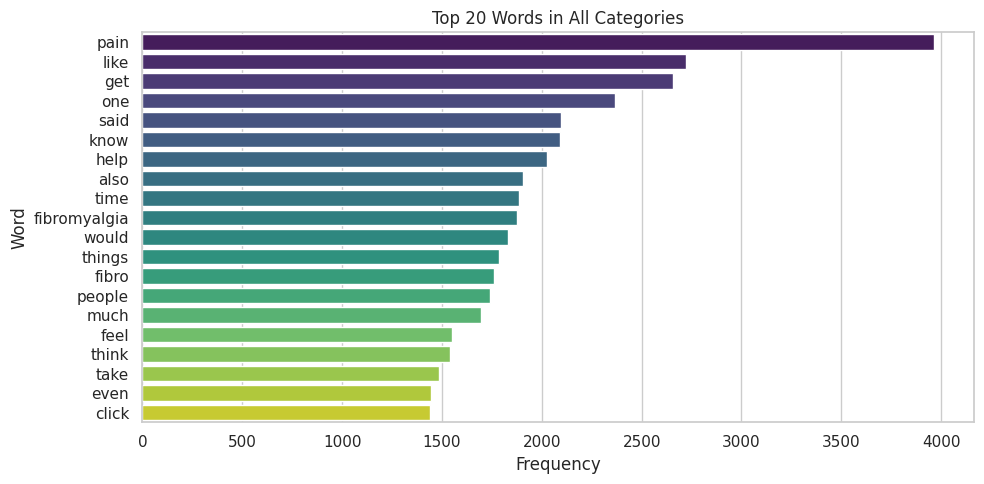

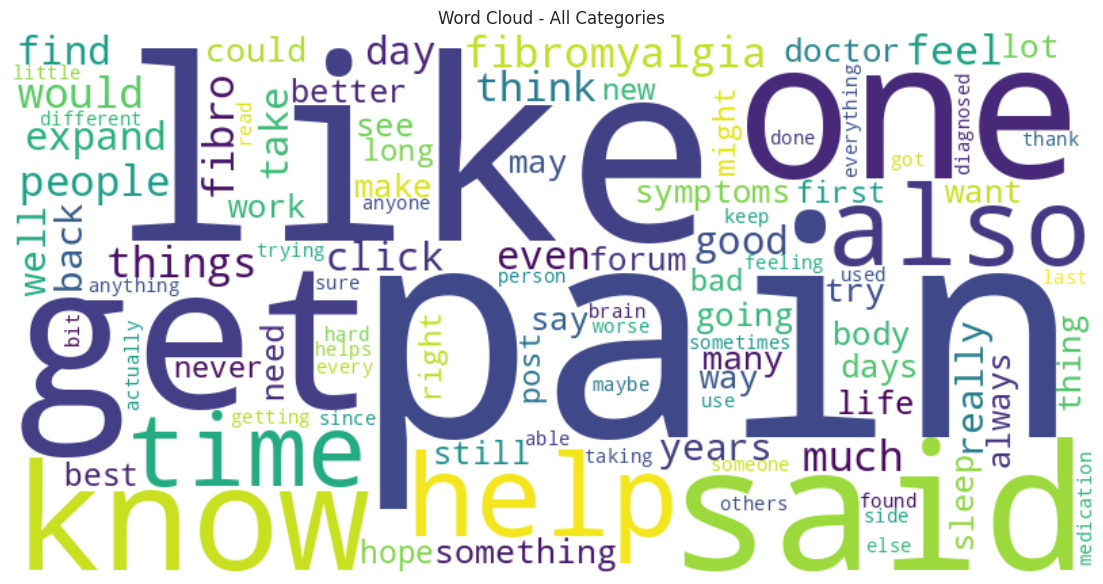

In [ ]:
# All posts combined
plot_top_words_and_wordcloud(df)


<ipython-input-74-76bff685de11>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()), palette="viridis")


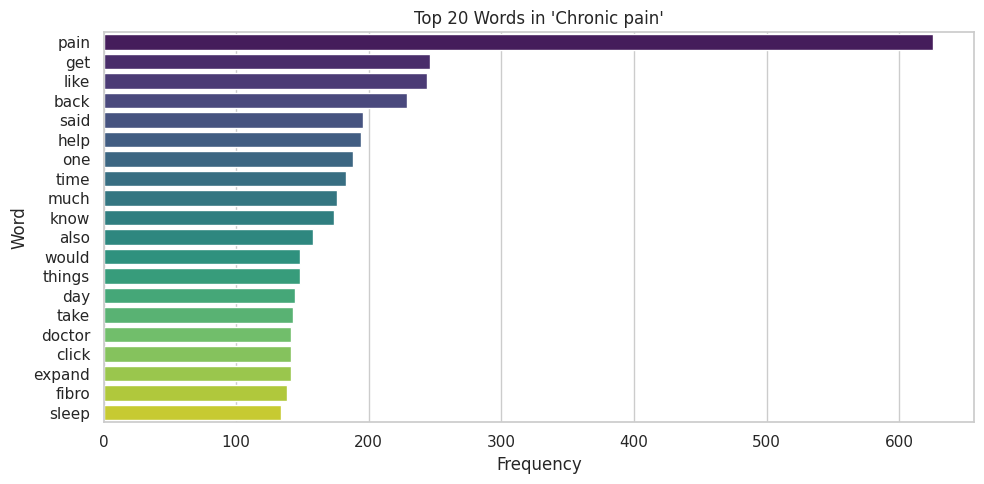

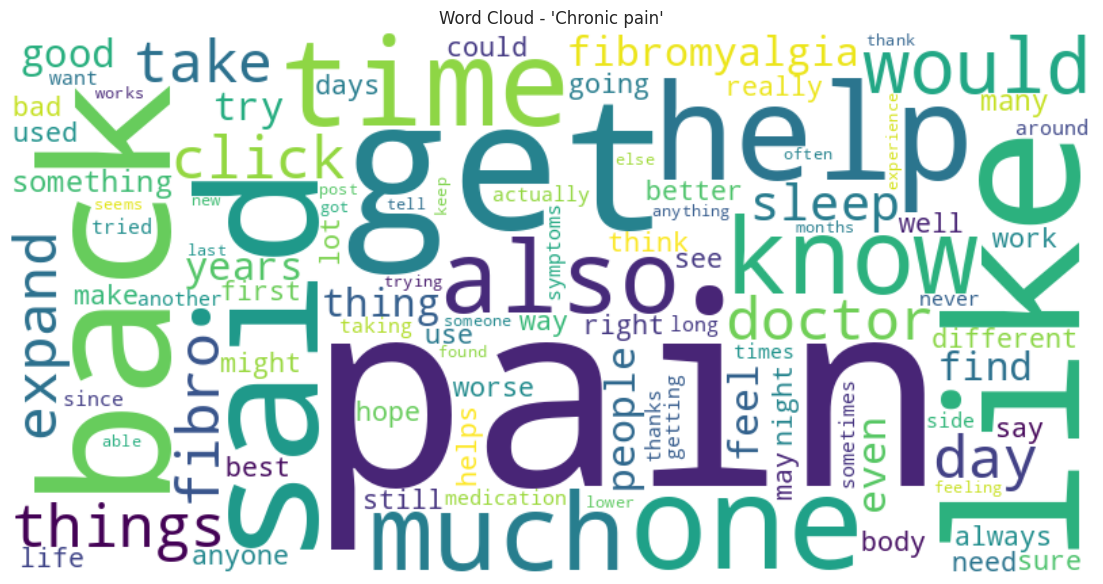

In [ ]:
# Specific category
plot_top_words_and_wordcloud(df, "Chronic pain")

Phase 3: Extract Emotionally Intense Keywords for LLM Prompts

In [ ]:
def get_emotionally_intense_keywords(df, category_name, top_n=20):
    words = top_words_by_category(df, category_name, n=200)
    emotional_triggers = [w for w, freq in words if w in [
        "cry", "alone", "worthless", "angry", "ignored", "helpless",
        "better", "thank", "finally", "pain", "flare", "scared", "exhausted"
    ]]
    return emotional_triggers[:top_n]

In [ ]:
get_emotionally_intense_keywords(df, "Moan, complain and vent")


['pain', 'better', 'thank', 'alone']

In [ ]:
df_clean['post_hour'] = pd.to_datetime(df_clean['timestamp_parsed'], errors='coerce').dt.hour


In [ ]:
top_countries = df_clean['country_name'].value_counts().head(5).index.tolist()
df_geo = df_clean[df_clean['country_name'].isin(top_countries)]


In [ ]:
def get_region(country):
    # Your custom mapping here (see previous message)
    if country in ['United States', 'Canada', 'Mexico']:
        return 'North America'
    elif country in ['United Kingdom', 'Germany', 'France', 'Spain', 'Italy']:
        return 'Europe'
    elif country in ['Australia', 'New Zealand']:
        return 'Oceania'
    elif country in ['India', 'China', 'Japan', 'South Korea']:
        return 'Asia'
    elif country in ['Brazil', 'Argentina', 'Colombia']:
        return 'South America'
    elif country in ['South Africa', 'Nigeria', 'Egypt']:
        return 'Africa'
    else:
        return None # Or a different default value

df_clean['region'] = df_clean['country_name'].apply(get_region)
top_regions = df_clean['region'].value_counts().head(5).index.tolist()
df_geo = df_clean[df_clean['region'].isin(top_regions)]

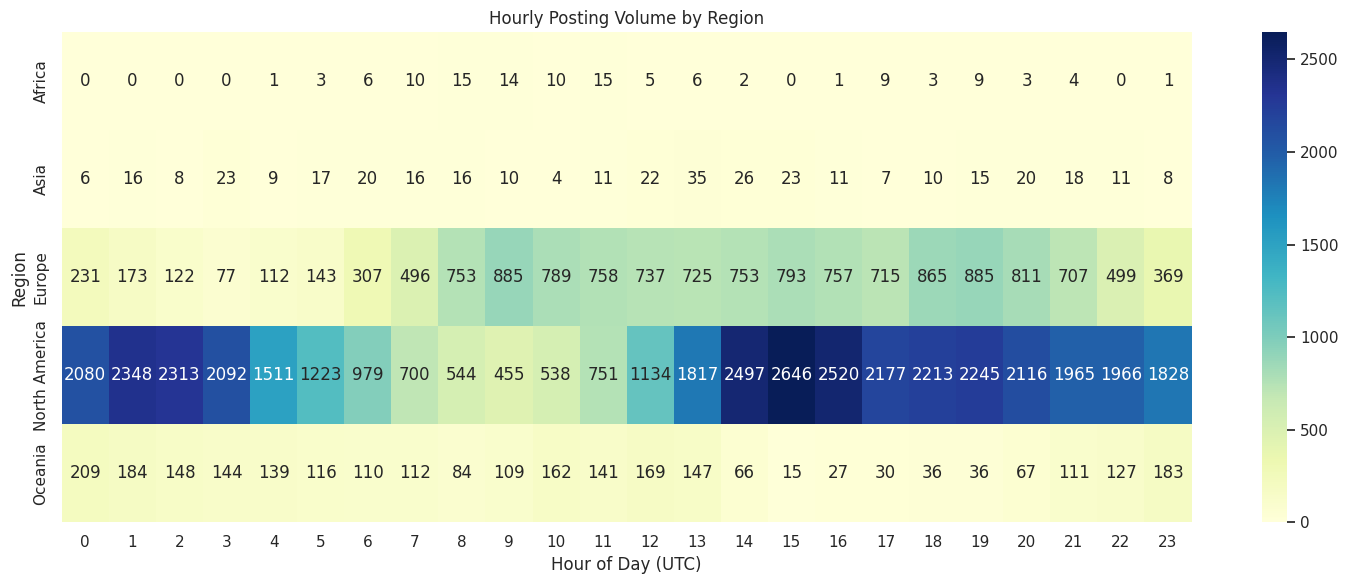

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df_geo.pivot_table(index='region', columns='post_hour', values='post_id', aggfunc='count', fill_value=0)
plt.figure(figsize=(15,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Hourly Posting Volume by Region')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [ ]:
top_countries = df_clean[df_clean['country_name'] != 'Unknown']['country_name'].value_counts().head(5).index.tolist()
df_top_countries = df_clean[df_clean['country_name'].isin(top_countries)]


In [ ]:
hour_country_counts = (
    df_top_countries
    .groupby(['post_hour', 'country_name'])['post_id']
    .count()
    .reset_index()
)


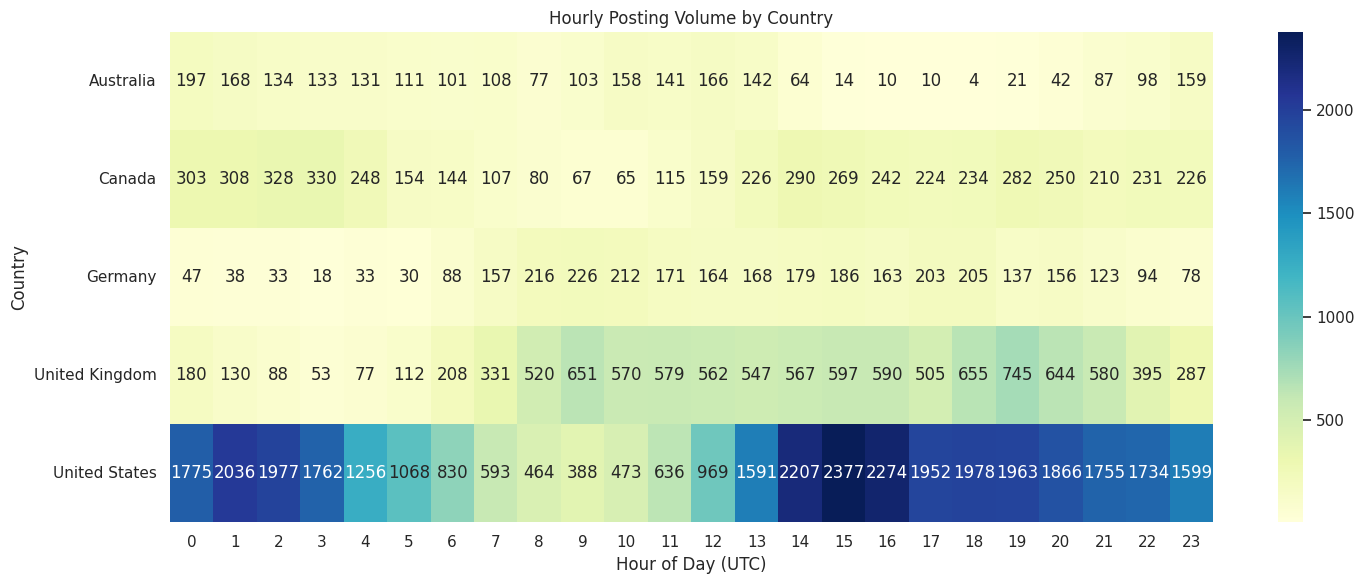

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = hour_country_counts.pivot(index='country_name', columns='post_hour', values='post_id').fillna(0)
plt.figure(figsize=(15,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Hourly Posting Volume by Country')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


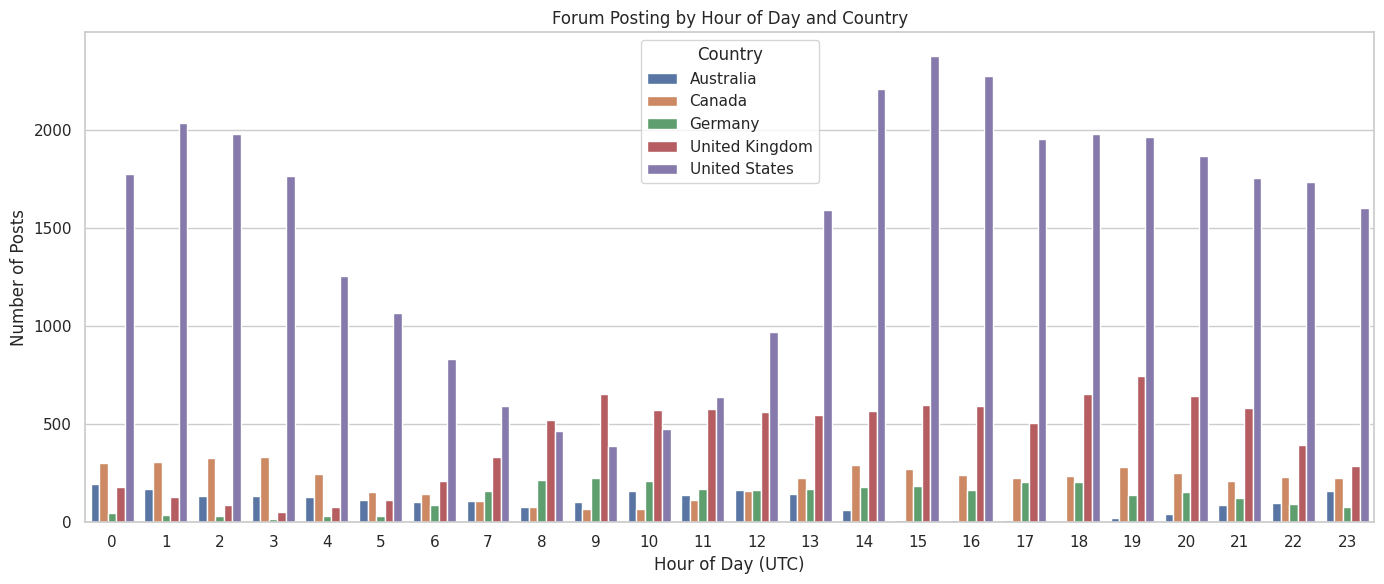

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=hour_country_counts, x='post_hour', y='post_id', hue='country_name')
plt.title('Forum Posting by Hour of Day and Country')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Number of Posts')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


In [ ]:
top_countries = df_clean['country_name'].value_counts().head(5)
display(top_countries)

,count
country_name,
United States,35523
United Kingdom,10173
Canada,5092
Unknown,4357
Germany,3125


In [ ]:
top_countries_known = df_clean[df_clean['country_name'] != 'Unknown']['country_name'].value_counts().head(5)
display(top_countries_known)

,count
country_name,
United States,35523
United Kingdom,10173
Canada,5092
Germany,3125
Australia,2379


In [ ]:
import pandas as pd
import plotly.express as px

# --- Step 1: Prepare the Data for Geographic Temporal Analysis ---
print("--- Preparing data for geographic temporal analysis ---")

# Ensure the timestamp and hour columns are correct
# This assumes you have a parsed timestamp column, let's call it 'timestamp_parsed'
# Convert to datetime, coercing errors
df_clean['timestamp_parsed'] = pd.to_datetime(df_clean['timestamp'], errors='coerce')

df_clean['hour_of_day'] = df_clean['timestamp_parsed'].dt.hour

# To make the analysis clearer, we will group countries into broader regions.
# This also helps to handle countries with fewer posts.
def assign_region(country):
    # This list can be expanded if you identify more European countries in your data
    european_countries = ['United Kingdom', 'Ireland', 'Germany', 'Netherlands', 'Portugal', 'Romania', 'Sweden', 'Norway', 'Finland', 'Croatia']

    if country in ['United States', 'Canada', 'Mexico']:
        return 'North America'
    elif country in european_countries:
        return 'Europe'
    elif country in ['Australia', 'New Zealand']:
        return 'Oceania'
    elif pd.notna(country): # Any other non-null country
        return 'Other'
    else: # If country is NaN
        return 'Unknown'

# Create the new 'region' column from your cleaned 'country_name' column
df_clean['region'] = df_clean['country_name'].apply(assign_region)

# Group the data by hour and by our new region, then count the posts
hourly_activity_by_region = df_clean.groupby(['hour_of_day', 'region'])['post_id'].count().reset_index(name='post_count')

print("✅ Data prepared successfully.")


# --- Step 2: Create the Stacked Area Chart ---
print("\n--- Generating Visualization: Hourly Post Volume by Geographic Region ---")

fig = px.area(
    hourly_activity_by_region,
    x='hour_of_day',
    y='post_count',
    color='region',
    title='<b>Hourly Post Volume by Geographic Region (UTC)</b>',
    labels={'hour_of_day': 'Hour of Day (UTC)', 'post_count': 'Number of Posts', 'region': 'User Region'},
    template='plotly_white',
    # Define a specific color map for clarity
    color_discrete_map={
        'North America': 'teal',
        'Europe': 'orange',
        'Oceania': 'purple',
        'Other': 'lightgrey',
        'Unknown': 'silver'
    }
)

# Add annotations to explicitly explain the peaks
fig.add_annotation(
    x=18, y=2800, # Adjust y-position as needed based on your chart's scale
    text="<b>Main Peak:</b><br>Afternoon/Evening in North America",
    showarrow=True, arrowhead=1, ax=-40, ay=-40, bgcolor="rgba(255,255,255,0.7)"
)
fig.add_annotation(
    x=2, y=2000, # Adjust y-position as needed
    text="<b>Secondary Peak:</b><br>Afternoon/Evening in Europe",
    showarrow=True, arrowhead=1, ax=40, ay=-30, bgcolor="rgba(255,255,255,0.7)"
)

fig.update_layout(
    font=dict(family="Arial", size=14),
    xaxis=dict(tickmode='linear') # Ensure all hours are shown
)

fig.show()

--- Preparing data for geographic temporal analysis ---
✅ Data prepared successfully.

--- Generating Visualization: Hourly Post Volume by Geographic Region ---


In [ ]:
country_tz = {
    'UK': 'Europe/London',
    'United States': 'America/New_York',  # Or refine by region
    'Canada': 'America/Toronto',
    'Australia': 'Australia/Sydney',
    'Germany': 'Europe/Berlin',
    # Add more mappings as needed...
}
# Add a 'timezone' column using this mapping
df['timezone'] = df['country_name'].map(country_tz).fillna('UTC')


In [ ]:
import pandas as pd

# Ensure your timestamp is timezone-aware UTC
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True, errors='coerce')

# Function to localize post to user’s timezone
def local_time(row):
    try:
        # Attempt timezone conversion
        localized_time = row['timestamp'].tz_convert(row['timezone'])
        return localized_time
    except Exception:
        # Return NaT if conversion fails (e.g., invalid timezone)
        return pd.NaT

df['local_time'] = df.apply(local_time, axis=1)

# Ensure 'local_time' is datetime type before extracting hour, handling NaT
df['local_hour'] = pd.to_datetime(df['local_time'], errors='coerce').dt.hour

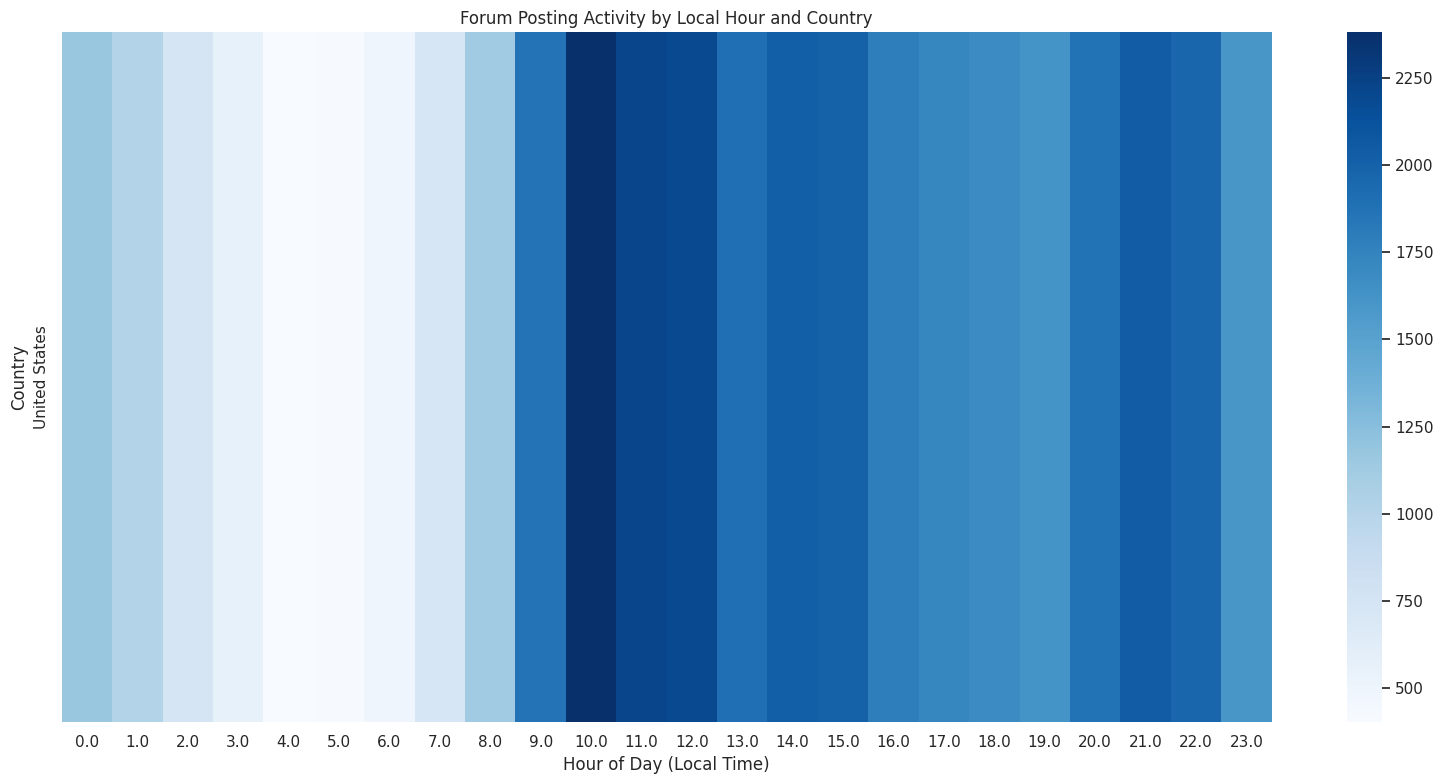

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped = df.groupby(['country_name', 'local_hour']).size().reset_index(name='count')

# Plot a heatmap of countries (rows) vs local hour (columns)
pivot = grouped.pivot(index='country_name', columns='local_hour', values='count').fillna(0)
plt.figure(figsize=(16, 8))
sns.heatmap(pivot, cmap='Blues', annot=False)
plt.title('Forum Posting Activity by Local Hour and Country')
plt.xlabel('Hour of Day (Local Time)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


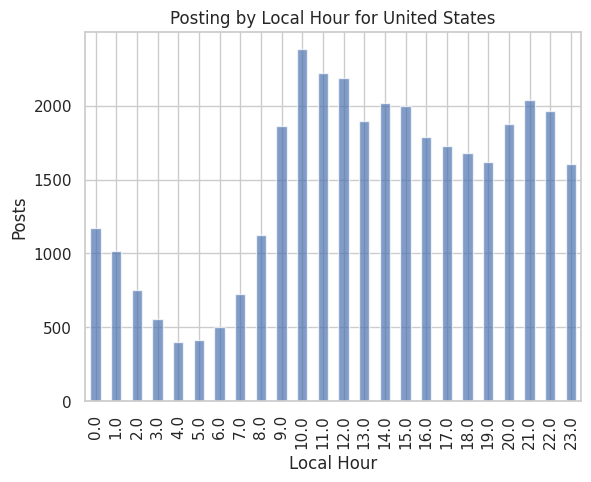

No valid local hour data to plot for Australia
No valid local hour data to plot for Germany
No valid local hour data to plot for Canada
No valid local hour data to plot for United Kingdom
No valid local hour data to plot for Romania
No valid local hour data to plot for Cyprus
No valid local hour data to plot for Unknown
No valid local hour data to plot for New Zealand
No valid local hour data to plot for Russia
No valid local hour data to plot for Ireland
No valid local hour data to plot for Saudi Arabia
No valid local hour data to plot for Spain
No valid local hour data to plot for Samoa
No valid local hour data to plot for Europe
No valid local hour data to plot for Denmark
No valid local hour data to plot for Greece
No valid local hour data to plot for Hungary
No valid local hour data to plot for India
No valid local hour data to plot for Sweden
No valid local hour data to plot for Portugal
No valid local hour data to plot for Iran
No valid local hour data to plot for Finland
No val

In [ ]:
for ctry in df['country_name'].unique():
    subset = df[df['country_name'] == ctry]
    # Check if there are any valid local_hour values before plotting
    if not subset['local_hour'].dropna().empty:
        subset['local_hour'].value_counts().sort_index().plot(kind='bar', alpha=0.7, label=ctry)
        plt.title(f'Posting by Local Hour for {ctry}')
        plt.xlabel('Local Hour')
        plt.ylabel('Posts')
        plt.show()
    else:
        print(f"No valid local hour data to plot for {ctry}")

In [ ]:
import pandas as pd
import plotly.express as px

# --- Step 1: Identify the Top 5 Most Active Countries ---
print("--- Identifying the Top 5 Countries by Post Volume ---")

# Calculate post counts for each country
country_counts = df_clean['country_name'].value_counts()
top_5_countries = country_counts.head(5).index.tolist()

print("Top 5 countries identified:", top_5_countries)


# --- Step 2: Define a Time Zone Map for the Top 5 Countries ---
# We define a representative UTC offset for each country.
# This is a simplification, as countries like the US have multiple time zones.
# For this analysis, we use a primary time zone for each.
timezone_map_utc_offset = {
    'United States': -5,  # Eastern Time (EST/EDT is a common choice)
    'United Kingdom': 0,   # Greenwich Mean Time (GMT)
    'Canada': -5,         # Eastern Time (covers Toronto, etc.)
    'Australia': 10,      # Australian Eastern Standard Time (AEST)
    'Germany': 1          # Central European Time (CET)
}
print("\nTime zone map created for top countries.")


# --- Step 3: Prepare the Data for Local Time Analysis ---
print("--- Preparing data for local time analysis ---")

# Filter the DataFrame to include only posts from our top 5 countries
top_countries_df = df_clean[df_clean['country_name'].isin(top_5_countries)].copy()

# Ensure timestamp and hour columns are correct
if 'timestamp_parsed' not in top_countries_df.columns:
    top_countries_df['timestamp_parsed'] = pd.to_datetime(top_countries_df['timestamp'], errors='coerce')
top_countries_df['hour_of_day_utc'] = top_countries_df['timestamp_parsed'].dt.hour

# Map the UTC offset to each row
top_countries_df['utc_offset'] = top_countries_df['country_name'].map(timezone_map_utc_offset)

# Calculate the local hour for each post
# The modulo operator (%) ensures the hour wraps around correctly (e.g., 25 becomes 1)
top_countries_df['local_hour'] = (top_countries_df['hour_of_day_utc'] + top_countries_df['utc_offset']) % 24

# Group the data by local hour and by country, then count the posts
hourly_activity_by_country = top_countries_df.groupby(['local_hour', 'country_name'])['post_id'].count().reset_index(name='post_count')

print("✅ Data prepared successfully.")


# --- Step 4: Create the Line Plot Visualization ---
print("\n--- Generating Visualization: Hourly Post Volume by Country (Local Time) ---")

fig = px.line(
    hourly_activity_by_country,
    x='local_hour',
    y='post_count',
    color='country_name',
    title='<b>Daily Posting Rhythms by Country (in User\'s Local Time)</b>',
    labels={'local_hour': 'Hour of Day (Local Time)', 'post_count': 'Number of Posts', 'country_name': 'Country'},
    template='plotly_white'
)

fig.update_layout(
    font=dict(family="Arial", size=14),
    xaxis=dict(tickmode='linear', dtick=1) # Ensure all 24 hours are shown on the axis
)

fig.show()

--- Identifying the Top 5 Countries by Post Volume ---
Top 5 countries identified: ['United States', 'United Kingdom', 'Canada', 'Unknown', 'Germany']

Time zone map created for top countries.
--- Preparing data for local time analysis ---
✅ Data prepared successfully.

--- Generating Visualization: Hourly Post Volume by Country (Local Time) ---


In [ ]:
print(df['country_name'].value_counts())
print(df[df['local_hour'].notna()]['country_name'].value_counts())


country_name
United States      35523
United Kingdom     10173
Canada              5092
Unknown             4357
Germany             3125
                   ...  
North Macedonia        1
Gambia                 1
Ecuador                1
El Salvador            1
Egypt                  1
Name: count, Length: 82, dtype: int64
country_name
United States    35523
Name: count, dtype: int64


In [ ]:
# Filter DataFrame for United States and plot
us_subset = df[df['country_name'] == 'United States']
print(us_subset['local_hour'].dropna())


0        14.0
2         8.0
3        10.0
4        10.0
5        16.0
         ... 
66606    10.0
66607    20.0
66608     6.0
66609    23.0
66610    19.0
Name: local_hour, Length: 35523, dtype: float64


--- Identifying the Top 5 Countries by Post Volume ---
Top 5 countries identified: ['United States', 'United Kingdom', 'Canada', 'Germany', 'Australia']

--- Preparing data for local time analysis ---

--- Generating Heatmap of Hourly Post Volume by Country (Local Time) ---


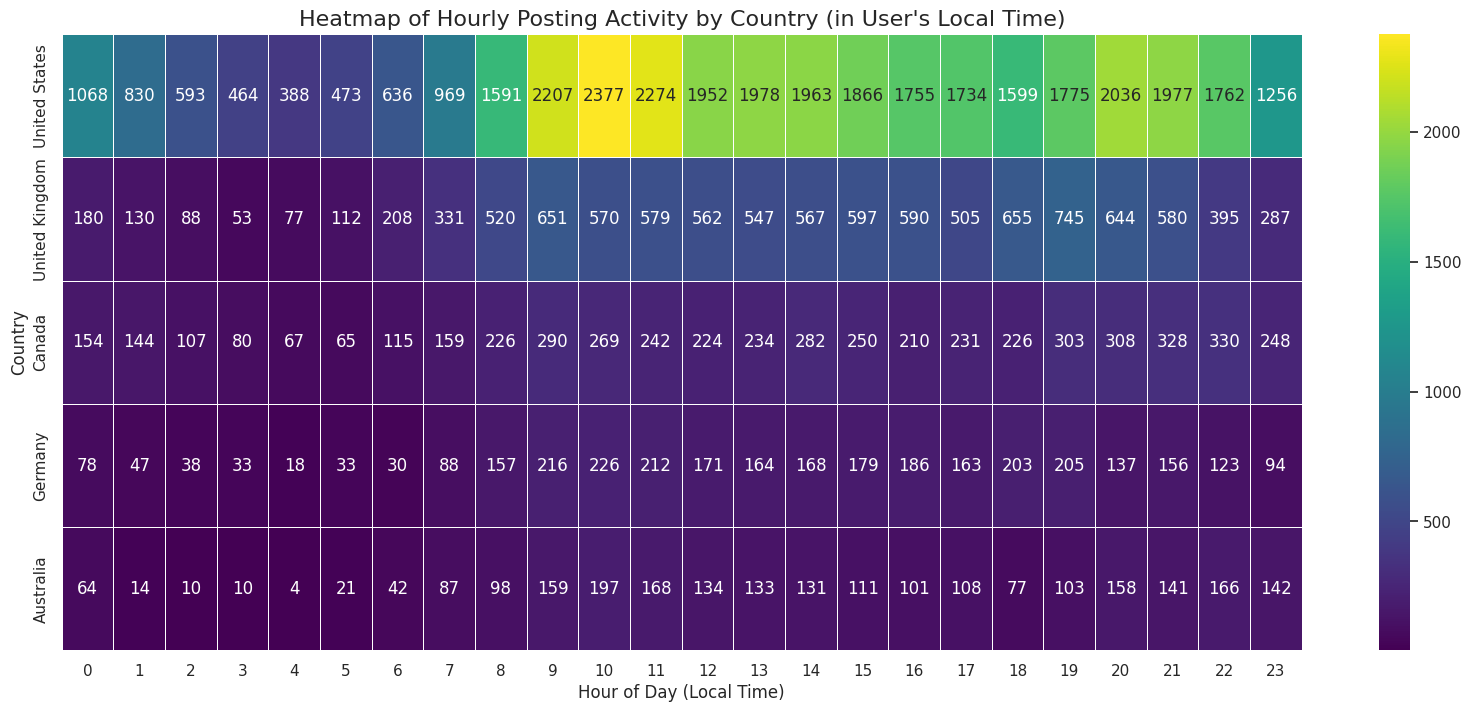

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Identify the Top 5 Most Active Countries ---
print("--- Identifying the Top 5 Countries by Post Volume ---")
country_counts = df_clean[df_clean['country_name'] != 'Unknown']['country_name'].value_counts()
top_5_countries = country_counts.head(5).index.tolist()
print("Top 5 countries identified:", top_5_countries)


# --- Step 2: Define a Time Zone Map for the Top 5 Countries ---
timezone_map_utc_offset = {
    'United States': -5,  # Eastern Time (EST/EDT)
    'United Kingdom': 0,   # Greenwich Mean Time (GMT)
    'Canada': -5,         # Eastern Time (covers Toronto, etc.)
    'Australia': 10,      # Australian Eastern Standard Time (AEST)
    'Germany': 1          # Central European Time (CET)
}


# --- Step 3: Prepare the Data for Local Time Analysis ---
print("\n--- Preparing data for local time analysis ---")
top_countries_df = df_clean[df_clean['country_name'].isin(top_5_countries)].copy()

if 'timestamp_parsed' not in top_countries_df.columns:
    top_countries_df['timestamp_parsed'] = pd.to_datetime(top_countries_df['timestamp'], errors='coerce')
top_countries_df['hour_of_day_utc'] = top_countries_df['timestamp_parsed'].dt.hour
top_countries_df['utc_offset'] = top_countries_df['country_name'].map(timezone_map_utc_offset)
top_countries_df['local_hour'] = (top_countries_df['hour_of_day_utc'] + top_countries_df['utc_offset']) % 24

# Group the data by local hour and by country
hourly_activity_by_country = top_countries_df.groupby(['local_hour', 'country_name'])['post_id'].count().reset_index(name='post_count')


# --- Step 4: Create the Heatmap Visualization ---
print("\n--- Generating Heatmap of Hourly Post Volume by Country (Local Time) ---")

# Pivot the data to create a matrix suitable for a heatmap
# Index: Country, Columns: Hour, Values: Post Count
heatmap_data = hourly_activity_by_country.pivot_table(
    index='country_name',
    columns='local_hour',
    values='post_count',
    fill_value=0
)

# Ensure all 24 hours are present in the columns
heatmap_data = heatmap_data.reindex(columns=range(24), fill_value=0)

# Reorder the rows to match the top 5 list for consistency
heatmap_data = heatmap_data.reindex(top_5_countries)

# Create the plot using Seaborn for a classic heatmap look
plt.figure(figsize=(20, 8))
sns.heatmap(
    heatmap_data,
    cmap='viridis', # A color map that shows high values clearly
    annot=True,     # Show the number of posts in each cell
    fmt='.0f',        # Format the numbers as integers
    linewidths=.5
)

plt.title('Heatmap of Hourly Posting Activity by Country (in User\'s Local Time)', fontsize=16)
plt.xlabel('Hour of Day (Local Time)')
plt.ylabel('Country')
plt.show()

--- Identifying the Top 5 Countries by Post Volume ---
Top 5 countries identified: ['United States', 'United Kingdom', 'Canada', 'Germany', 'Australia']

Time zone map created for top countries.

--- Generating Individual Activity Plots for Each Country ---


/tmp/ipython-input-65-3639688438.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




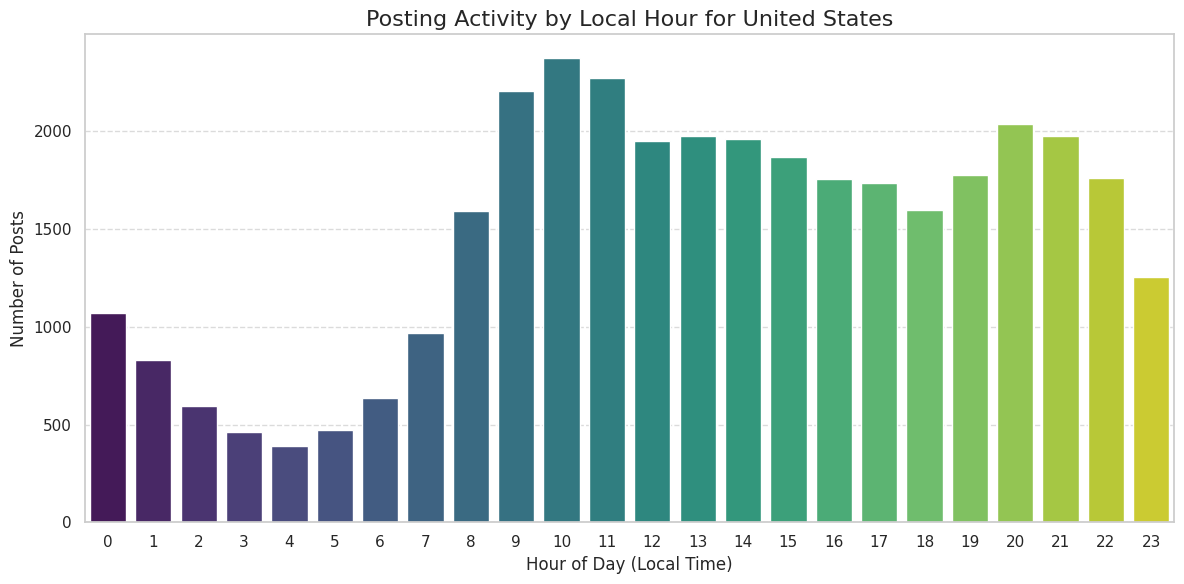

/tmp/ipython-input-65-3639688438.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




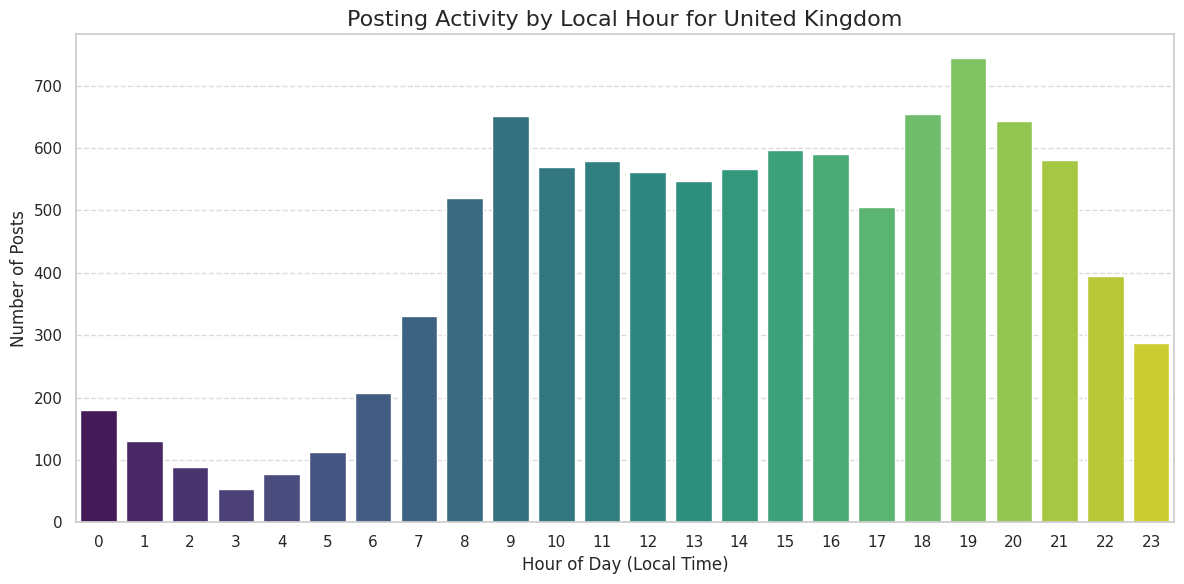

/tmp/ipython-input-65-3639688438.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




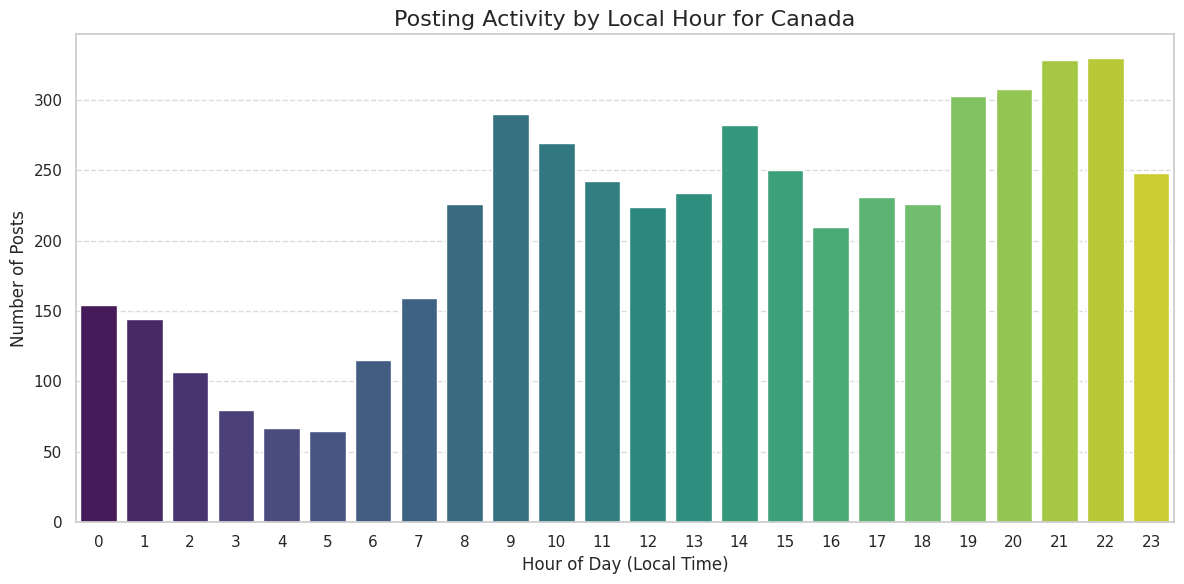

/tmp/ipython-input-65-3639688438.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




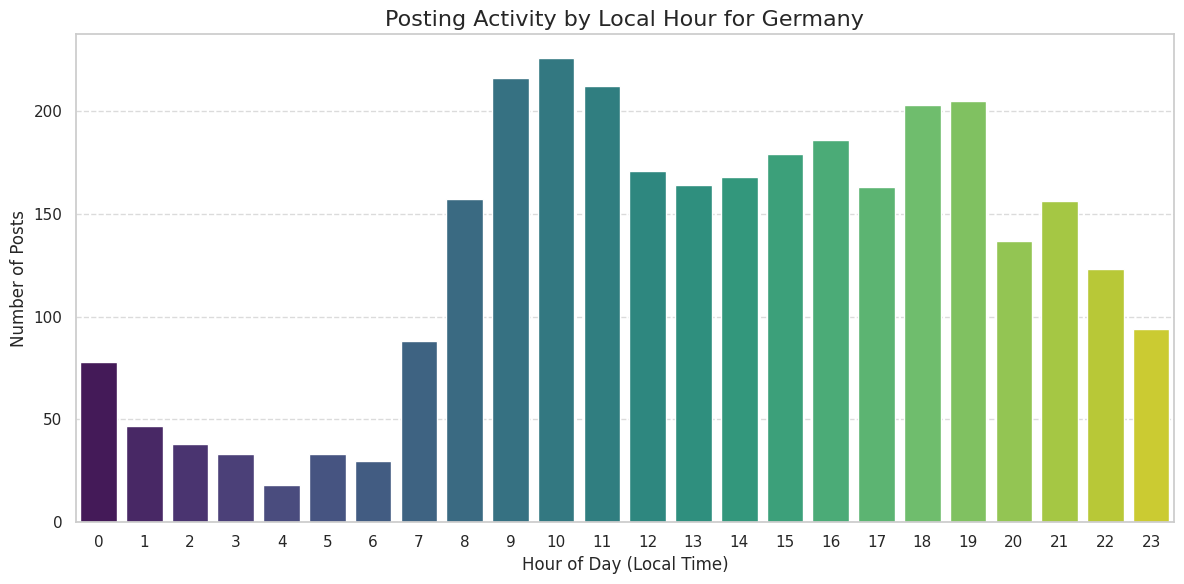

/tmp/ipython-input-65-3639688438.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




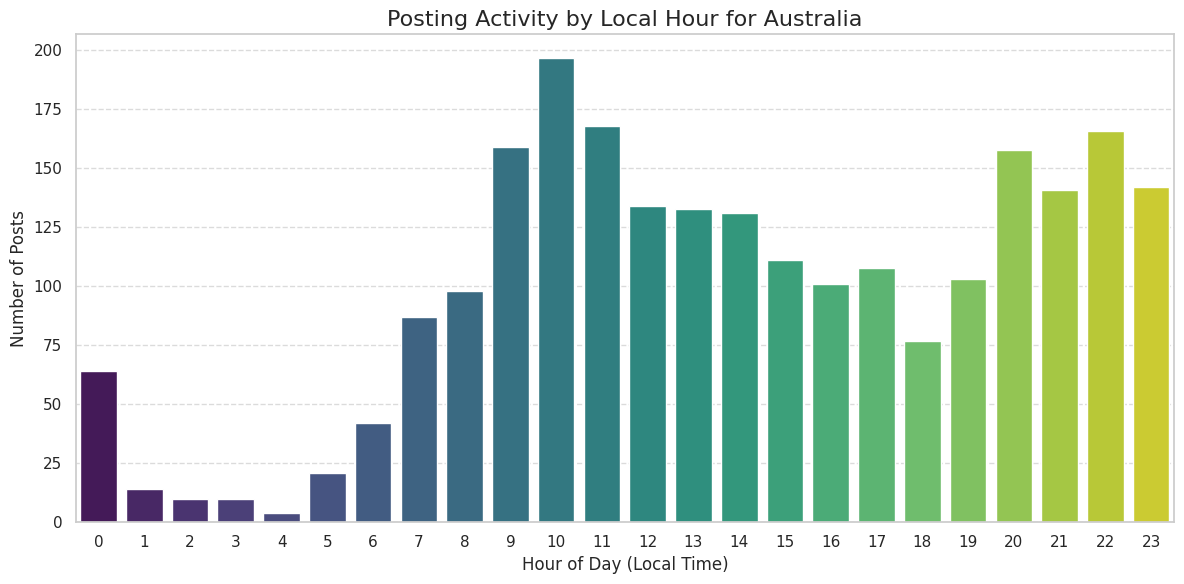

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Identify the Top 5 Most Active Countries ---
print("--- Identifying the Top 5 Countries by Post Volume ---")
country_counts = df_clean[df_clean['country_name'] != 'Unknown']['country_name'].value_counts()
top_5_countries = country_counts.head(5).index.tolist()
print("Top 5 countries identified:", top_5_countries)

# --- Step 2: Define a Time Zone Map for the Top 5 Countries ---
timezone_map_utc_offset = {
    'United States': -5,  # Eastern Time (EST/EDT)
    'United Kingdom': 0,   # Greenwich Mean Time (GMT)
    'Canada': -5,         # Eastern Time (covers Toronto, etc.)
    'Australia': 10,      # Australian Eastern Standard Time (AEST)
    'Germany': 1          # Central European Time (CET)
}
print("\nTime zone map created for top countries.")

# --- Step 3: Loop Through Each Country to Create a Plot ---
print("\n--- Generating Individual Activity Plots for Each Country ---")

# Ensure the timestamp column is in datetime format
if 'timestamp_parsed' not in df_clean.columns:
    df_clean['timestamp_parsed'] = pd.to_datetime(df_clean['timestamp'], errors='coerce')

# Extract UTC hour
df_clean['hour_of_day_utc'] = df_clean['timestamp_parsed'].dt.hour

# Loop through each of the top 5 countries
for country in top_5_countries:
    # Filter the DataFrame for the current country
    country_df = df_clean[df_clean['country_name'] == country].copy()

    # Get the UTC offset for this country from our map
    offset = timezone_map_utc_offset.get(country, 0) # Default to 0 if not in map

    # Calculate the local hour for each post
    country_df['local_hour'] = (country_df['hour_of_day_utc'] + offset) % 24

    # Count the number of posts for each local hour
    hourly_counts = country_df['local_hour'].value_counts().sort_index()

    # Ensure all 24 hours are present for a consistent plot
    hourly_counts = hourly_counts.reindex(range(24), fill_value=0)

    # --- Create the Bar Plot ---
    plt.figure(figsize=(12, 6))
    sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')

    plt.title(f'Posting Activity by Local Hour for {country}', fontsize=16)
    plt.xlabel('Hour of Day (Local Time)')
    plt.ylabel('Number of Posts')
    plt.xticks(range(24)) # Ensure all hour ticks are shown
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
country_timezone = {
    'United States': 'America/New_York',
    'United Kingdom': 'Europe/London',
    'Canada': 'America/Toronto',
    'Germany': 'Europe/Berlin',
    'Australia': 'Australia/Sydney'
}
df['timezone'] = df['country_name'].map(country_timezone).fillna('UTC')

In [ ]:
import pandas as pd

df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # ensure UTC awareness

def get_local_hour(row):
    try:
        # Handle missing/invalid timezones gracefully
        return row['timestamp'].tz_convert(row['timezone']).hour
    except Exception:
        return pd.NaT

df['local_hour'] = df.apply(get_local_hour, axis=1)


In [ ]:
# Limit to the five countries of interest
countries_focus = ['United States', 'United Kingdom', 'Canada', 'Germany', 'Australia']
df_focus = df[df['country_name'].isin(countries_focus)]

# Aggregate post counts by country and local hour
posts_by_country_hour = df_focus.groupby(['country_name', 'local_hour']).size().reset_index(name='post_count')


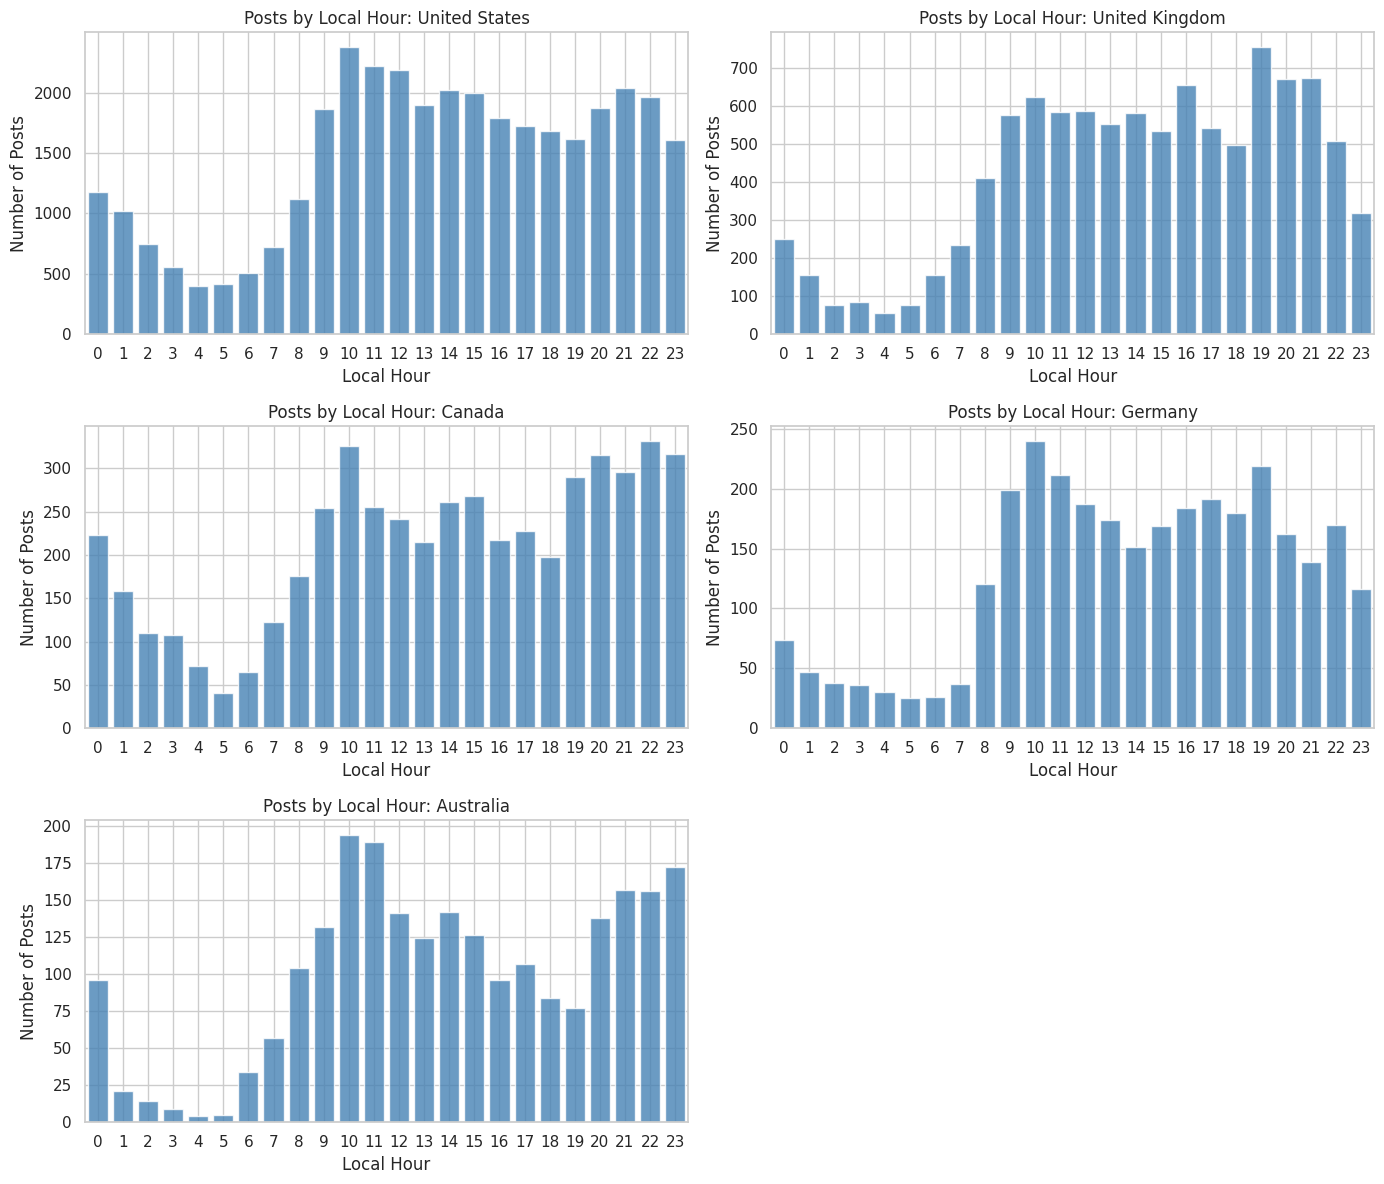

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, country in enumerate(countries_focus):
    subset = df_focus[df_focus['country_name'] == country]
    hour_counts = subset['local_hour'].value_counts().sort_index()
    axes[i].bar(hour_counts.index, hour_counts.values, color='steelblue', alpha=0.8)
    axes[i].set_title(f'Posts by Local Hour: {country}')
    axes[i].set_xlabel('Local Hour')
    axes[i].set_ylabel('Number of Posts')
    axes[i].set_xticks(range(0, 24))
    axes[i].set_xlim([-0.5, 23.5])

# Hide the sixth empty subplot (for a 5-country plot)
if len(axes) > len(countries_focus):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('posts_by_country_local_hour.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 8))
# for country in countries_focus:
#     subset = posts_by_country_hour[posts_by_country_hour['country_name'] == country]
#     plt.plot(subset['local_hour'], subset['post_count'], marker='o', label=country)

# plt.title('Post Volume by Local Hour for Top 5 Countries')
# plt.xlabel('Local Hour of Day')
# plt.ylabel('Number of Posts')
# plt.xticks(range(0, 24))
# plt.legend()
# plt.tight_layout()
# plt.show()


/tmp/ipython-input-88-878630280.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




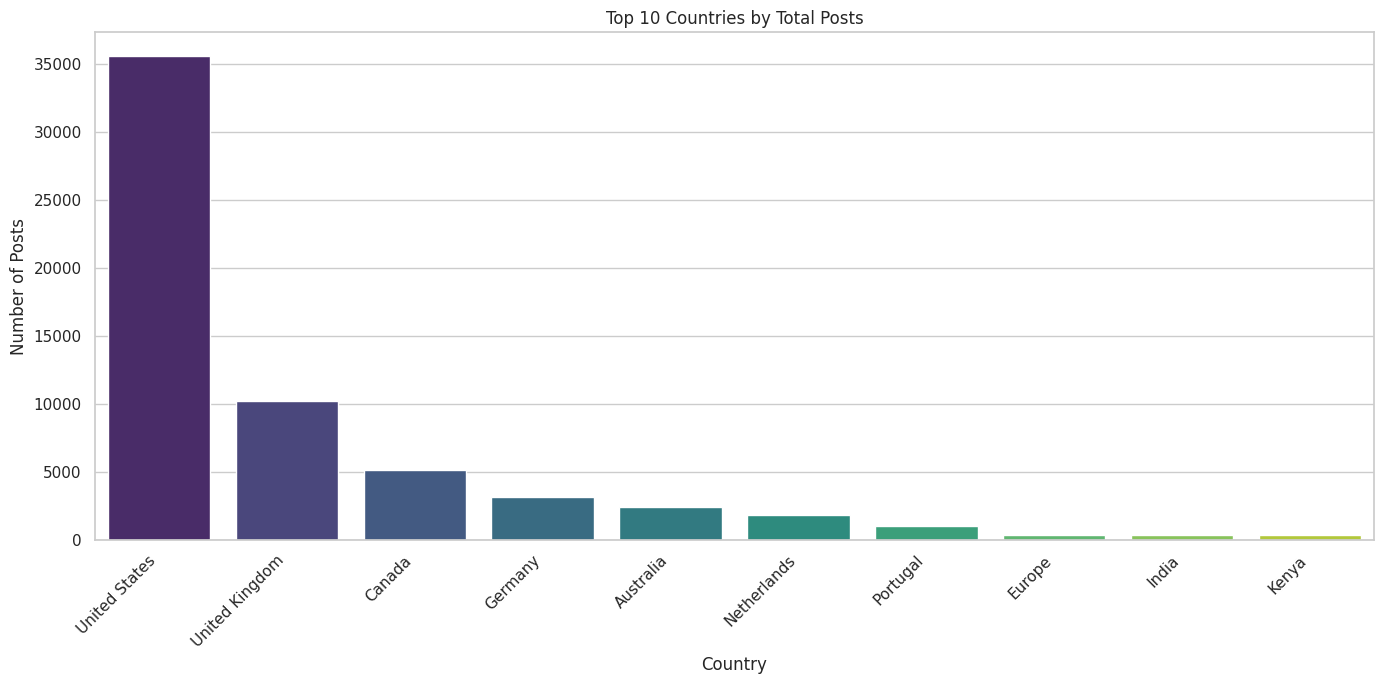

In [ ]:
# prompt: I need a bar chart for top 10 countries by total posts

import matplotlib.pyplot as plt
# Get the top 10 countries by total posts
top_10_countries_posts = df_clean[df_clean['country_name'] != 'Unknown']['country_name'].value_counts().head(10)

# Create the bar chart
plt.figure(figsize=(14, 7)) # Adjusted figure size for vertical bars
sns.barplot(x=top_10_countries_posts.index, y=top_10_countries_posts.values, palette="viridis") # Swapped x and y
plt.title("Top 10 Countries by Total Posts")
plt.xlabel("Country") # Swapped labels
plt.ylabel("Number of Posts") # Swapped labels
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()

plt.savefig('top_10_countries_by_total_posts.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.savefig('posts_by_country_local_hour.png', dpi=300, bbox_inches='tight')